# Imports

In [ ]:
from pathlib import Path
import h5py
import numpy as np

import matplotlib.pyplot as plt
from typing import Dict, List, Tuple

SIM_PATH = Path("../data/results/testing_fixtures_maize/maize_baseline.h5")
print(SIM_PATH.resolve())  # Te muestra la ruta absoluta
print(SIM_PATH.exists())  # True si existe, False si no

# Utility

In [ ]:
def recorrer_grupo(grupo, nivel=0):
    for key, item in grupo.items():
        print("  " * nivel + f"- {key}: {type(item)}")
        if isinstance(item, h5py.Group):
            recorrer_grupo(item, nivel + 1)


def load_results(sim_path: Path) -> Dict[str, np.ndarray]:
    with h5py.File(sim_path.resolve(), "r") as f:
        arrays: Dict[str, np.ndarray] = {}
        for key, dset in f["results"].items():  # type: ignore
            print(f"{key:15} shape={dset.shape}, dtype={dset.dtype}")
            if isinstance(dset, h5py.Dataset):
                arrays[key] = np.array(dset[:])  # pasar a numpy
    return arrays

In [83]:
data_dict_sim = load_results(SIM_PATH)

au_layers       shape=(278, 358, 4, 181), dtype=float64
biomass_cum     shape=(278, 358, 181), dtype=float64
biomass_daily   shape=(278, 358, 181), dtype=float64
ceh             shape=(278, 358, 181), dtype=float64
ceh_pc          shape=(278, 358, 181), dtype=float64
ceh_r           shape=(278, 358, 181), dtype=float64
cover           shape=(278, 358, 181), dtype=float64
dates           shape=(181,), dtype=int64
eff_precip      shape=(278, 358, 181), dtype=float64
et0             shape=(181,), dtype=float64
eur_act         shape=(278, 358, 181), dtype=float64
p_au            shape=(278, 358, 181), dtype=float64
par             shape=(181,), dtype=float64
precip          shape=(181,), dtype=float64
root_depth      shape=(278, 358, 181), dtype=float64
soil_evap       shape=(278, 358, 181), dtype=float64
t_eur           shape=(278, 358, 181), dtype=float64
temp            shape=(181,), dtype=float64
transpiration   shape=(278, 358, 181), dtype=float64
yield_tensor    shape=(278, 358, 181)

In [ ]:
keys = [
    "biomass_cum",
    "biomass_daily",
    "ceh",
    "ceh_pc",
    "ceh_r",
    "cover",
    "eff_precip",
    "eur_act",
    "p_au",
    "root_depth",
    "soil_evap",
    "transpiration",
    "yield_tensor",
]

In [85]:
#  Legacy:(T=181, W=358, H=278)
for key in keys:
    print(key, data_dict_sim[key].shape)

    data_array = data_dict_sim[key].T[0:3, 0:3, 0:3]

    print(data_array)

    break

biomass_cum (278, 358, 181)
[[[ 0.         28.21170056 28.21170056]
  [ 0.          0.         28.21170056]
  [ 0.          0.          0.        ]]

 [[ 0.         51.13977868 51.13977868]
  [ 0.          0.         51.13977868]
  [ 0.          0.          0.        ]]

 [[ 0.         79.70310274 79.70310274]
  [ 0.          0.         79.70310274]
  [ 0.          0.          0.        ]]]


In [ ]:
frame_t = data_dict_sim["biomass_cum"][:, :, :].T
print(frame_t.shape)
print(frame_t[:5, :3, :3])

# Visualization

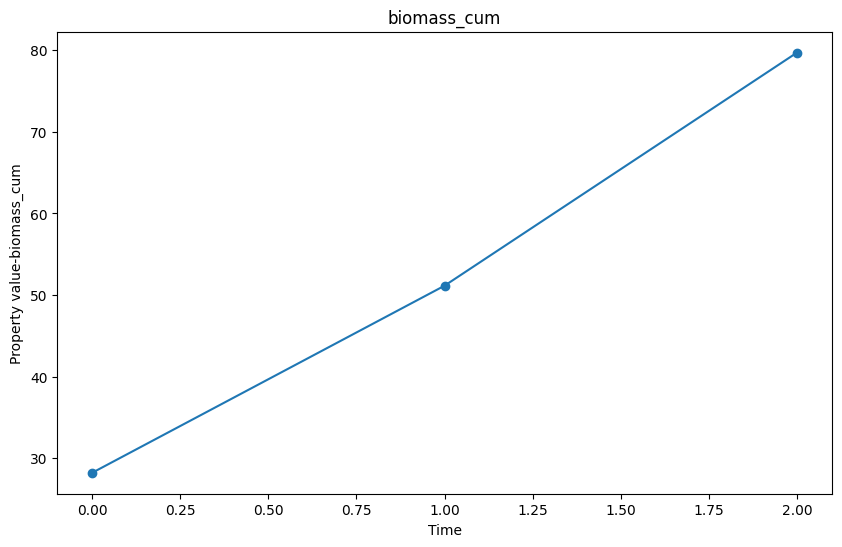

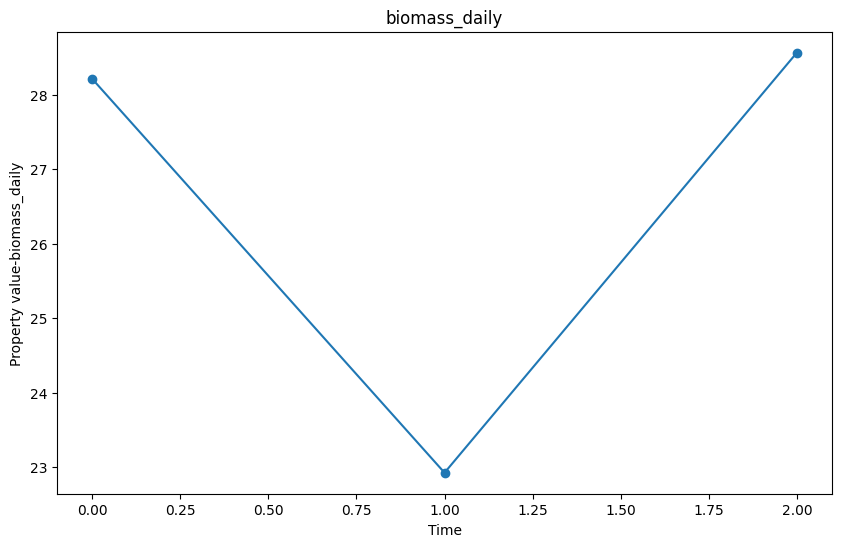

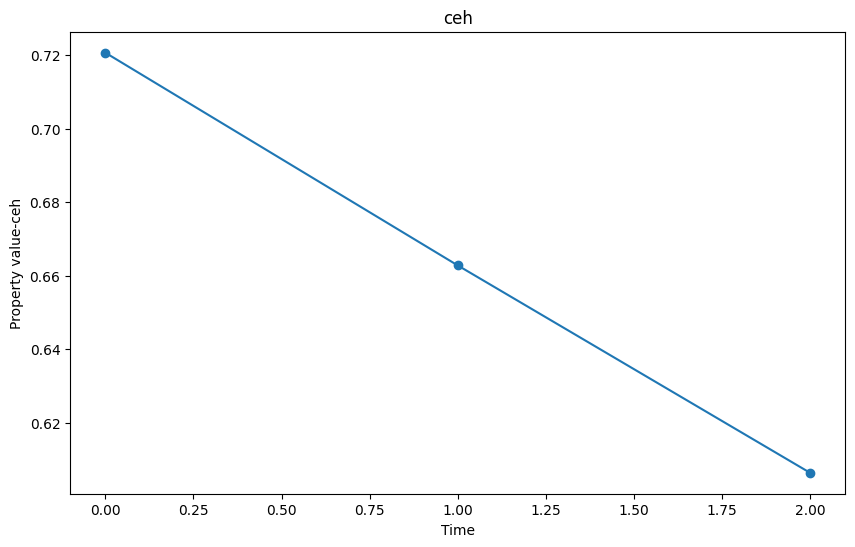

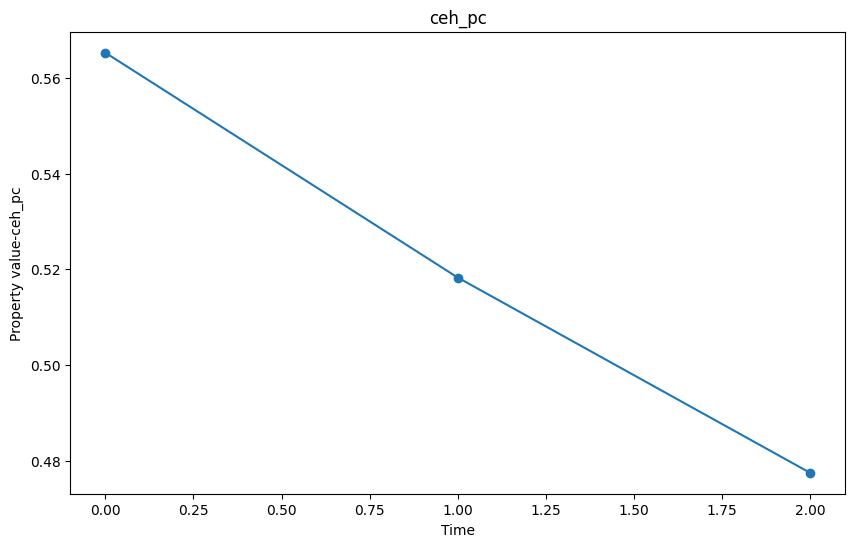

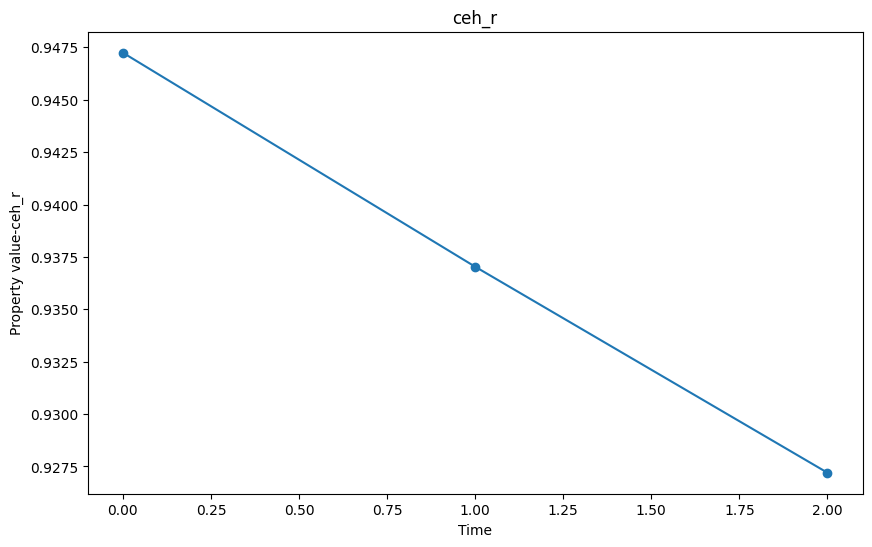

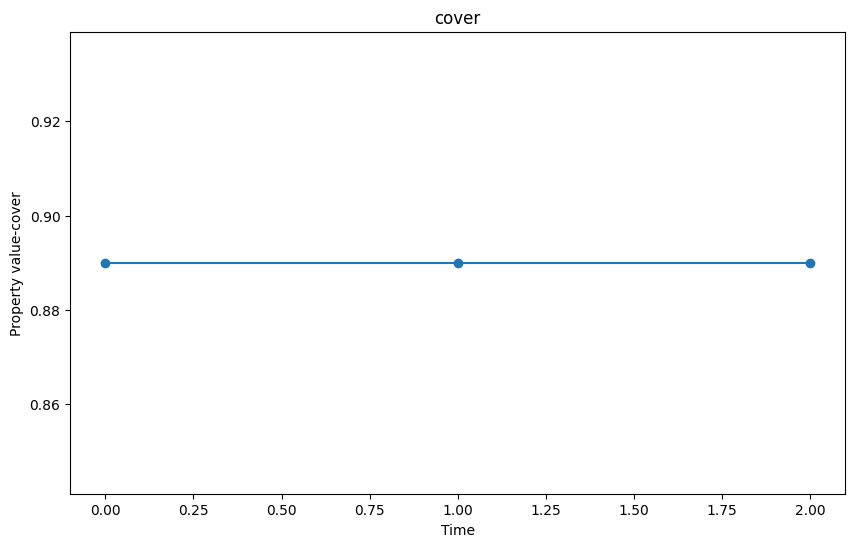

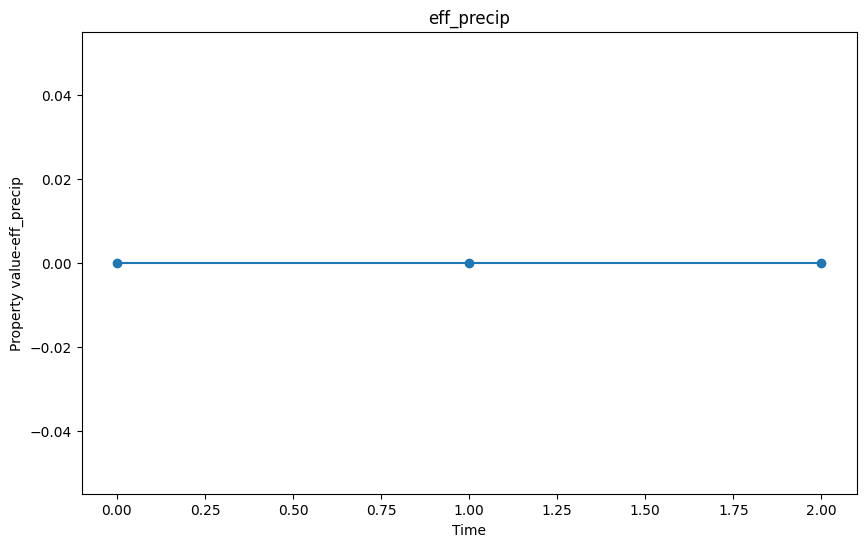

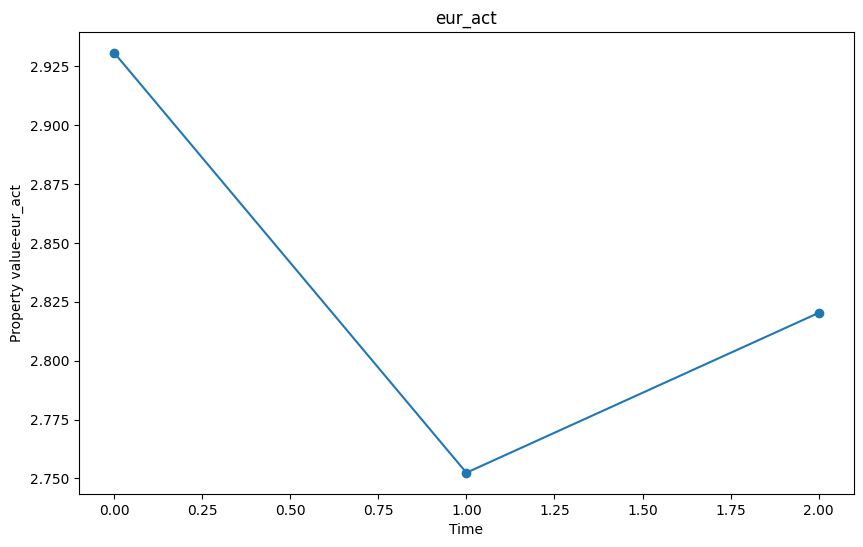

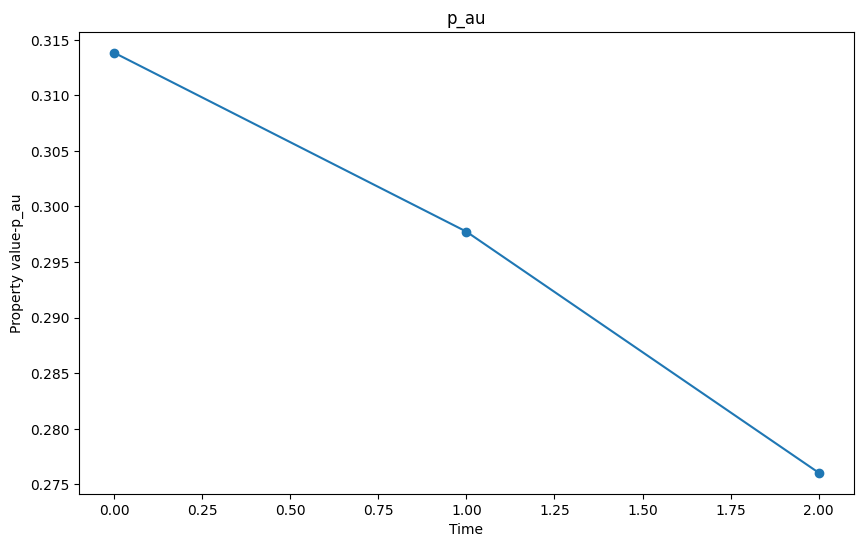

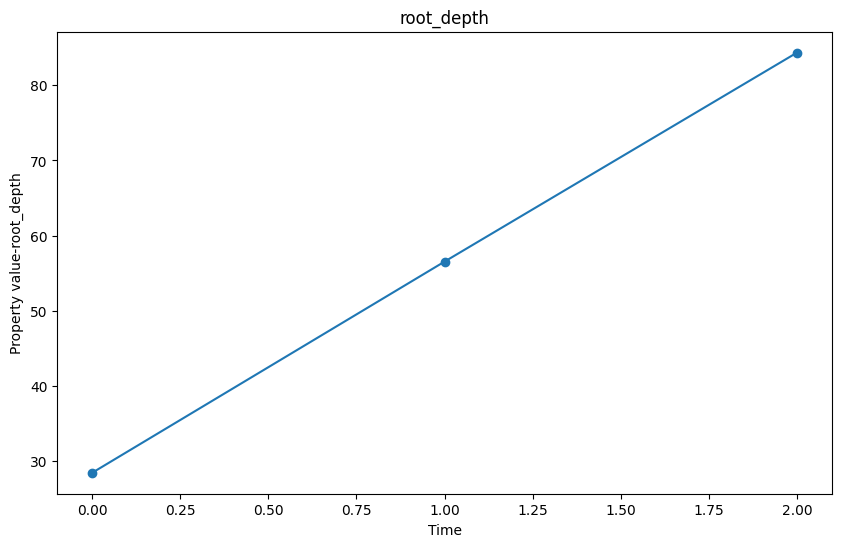

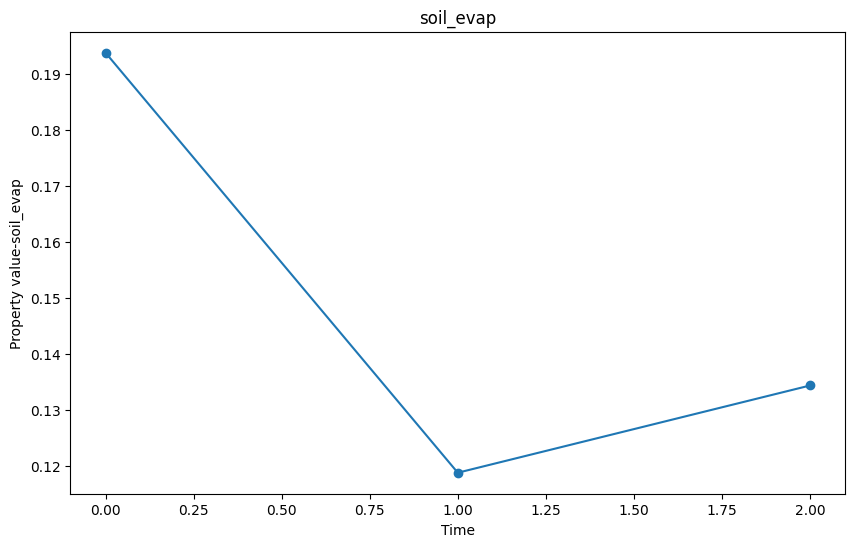

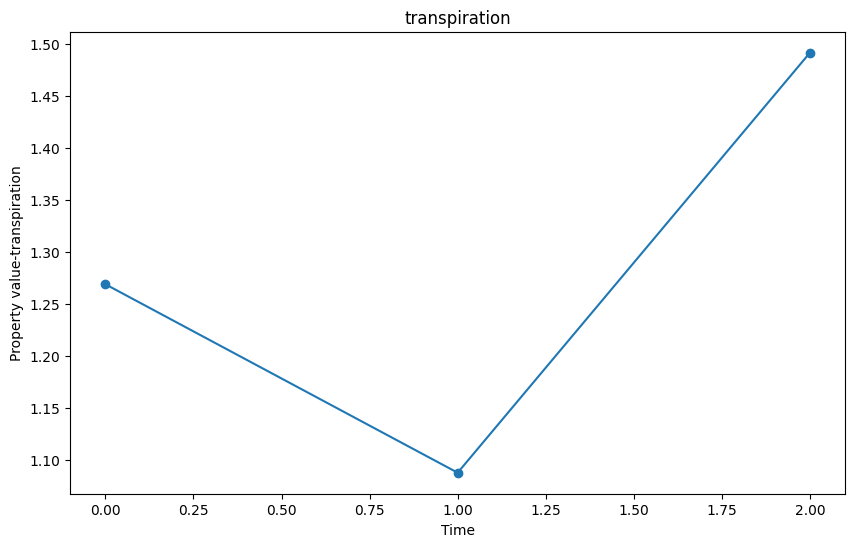

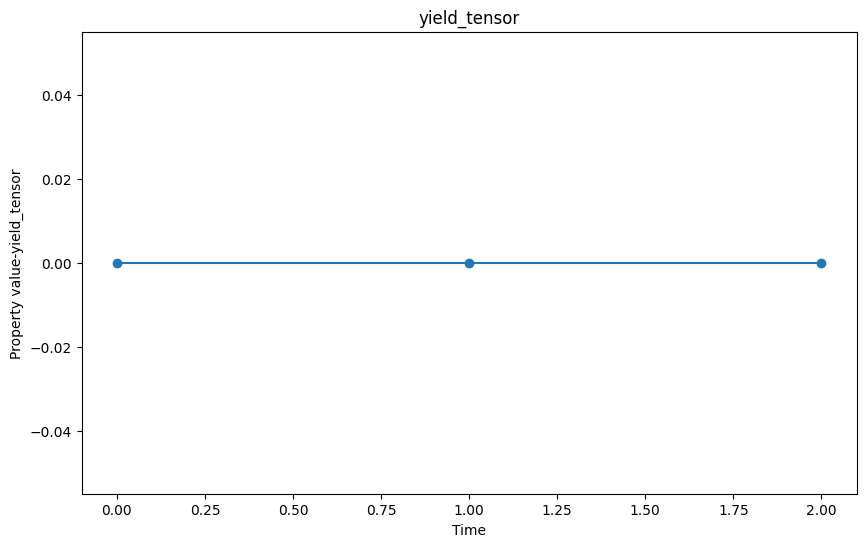

In [91]:
# data.shape = (278, 358, 181)
for key in keys:
    t = np.arange(181)
    tf = 3
    data_pixel = data_dict_sim[key][1, 0, :tf]

    plt.figure(figsize=(10, 6))
    plt.plot(t[:tf], data_pixel)
    plt.scatter(t[:tf], data_pixel)
    plt.xlabel("Time")
    plt.ylabel(f"Property value-{key}")
    plt.title(f"{key}")
    plt.show()